# 시계열 예측 문제
- 사인파형 시계열을 입력으로 다음 스텝의 출력을 예측
- 3개의 순서열을 입력한 후 출력값이 target과 일치하게 만듦

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

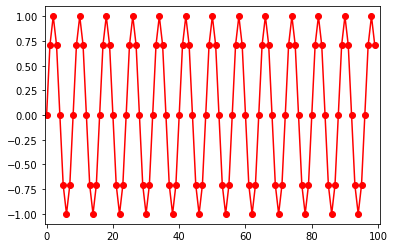

In [5]:
s = np.sin(2 * np.pi * 0.125 * np.arange(100))
plt.plot(s, 'ro-')
plt.xlim(-0.5, 100.5)
plt.ylim(-1.1, 1.1)
plt.show()

# 원래의 시계열 벡터를 Toeplitz 행렬 형태로 변환
- (대각선 위의 성분들이 같은 정사각 행렬)

In [9]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
S[:20, :3]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00],
       [-7.07106781e-01, -1.00000000e+00, -7.07106781e-01],
       [-1.00000000e+00, -7.07106781e-01, -2.44929360e-16],
       [-7.07106781e-01, -2.44929360e-16,  7.07106781e-01],
       [-2.44929360e-16,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  3.67394040e-16],
       [ 7.07106781e-01,  3.67394040e-16, -7.07106781e-01],
       [ 3.67394040e-16, -7.07106781e-01, -1.00000000e+00],
       [-7.07106781e-01, -1.00000000e+00, -7.07106781e-01],
       [-1.00000000e+00, -7.07106781e-01, -4.89858720e-16],
       [-7.07106781e-01, -4.89858720e-16,  7.07106781e-01],
       [-4.89858720e-16,  7.07106781e-01

In [10]:
X_train = S[:-1, :20][:, :, np.newaxis]
Y_train = S[:-1, 20]
X_train.shape, Y_train.shape

((98, 20, 1), (98,))

In [11]:
X_train[:20]

array([[[ 0.00000000e+00],
        [ 7.07106781e-01],
        [ 1.00000000e+00],
        [ 7.07106781e-01],
        [ 1.22464680e-16],
        [-7.07106781e-01],
        [-1.00000000e+00],
        [-7.07106781e-01],
        [-2.44929360e-16],
        [ 7.07106781e-01],
        [ 1.00000000e+00],
        [ 7.07106781e-01],
        [ 3.67394040e-16],
        [-7.07106781e-01],
        [-1.00000000e+00],
        [-7.07106781e-01],
        [-4.89858720e-16],
        [ 7.07106781e-01],
        [ 1.00000000e+00],
        [ 7.07106781e-01]],

       [[ 7.07106781e-01],
        [ 1.00000000e+00],
        [ 7.07106781e-01],
        [ 1.22464680e-16],
        [-7.07106781e-01],
        [-1.00000000e+00],
        [-7.07106781e-01],
        [-2.44929360e-16],
        [ 7.07106781e-01],
        [ 1.00000000e+00],
        [ 7.07106781e-01],
        [ 3.67394040e-16],
        [-7.07106781e-01],
        [-1.00000000e+00],
        [-7.07106781e-01],
        [-4.89858720e-16],
        [ 7.07106781e-01],

In [12]:

Y_train[:20]

array([ 6.12323400e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -7.34788079e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        8.57252759e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -9.79717439e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        1.10218212e-15, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01])

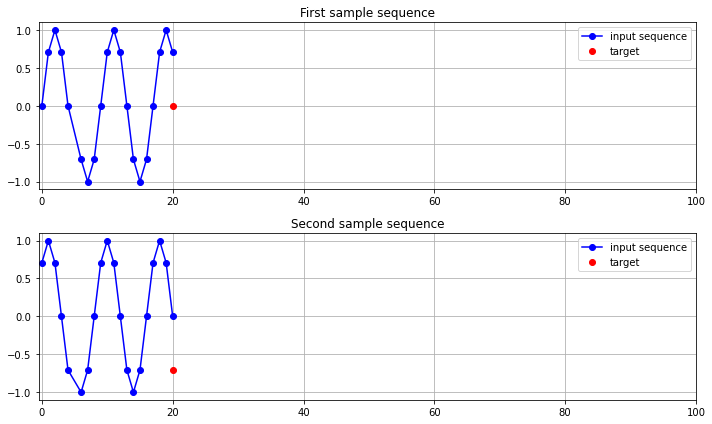

In [16]:

plt.figure(figsize=(10,6))

plt.subplot(211)
plt.plot([0, 1, 2, 3, 4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], X_train[0].flatten(), 'bo-', label="input sequence")
plt.plot([20], Y_train[0], 'ro', label="target")
plt.xlim(-0.5, 100)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("First sample sequence")

plt.subplot(212)
plt.plot([0, 1, 2, 3, 4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], X_train[1].flatten(), 'bo-', label="input sequence")
plt.plot([20], Y_train[1], 'ro', label="target")
plt.xlim(-0.5, 100)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("Second sample sequence")

plt.tight_layout()
plt.show()

In [17]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

seed = 2020
np.random.seed(seed)

Using TensorFlow backend.


In [18]:
model = Sequential()
model.add(SimpleRNN(10, input_shape=(20, 1)))
model.add(Dense(1, activation="linear"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='mse', optimizer='sgd')

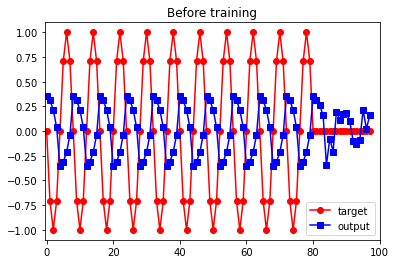

In [20]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 100)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("Before training")
plt.show()

In [21]:
history = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
98/98 [==============================] - 0s 1ms/step - loss: 0.6101
Epoch 2/100
98/98 [==============================] - 0s 153us/step - loss: 0.4575
Epoch 3/100
98/98 [==============================] - 0s 143us/step - loss: 0.3483
Epoch 4/100
98/98 [==============================] - 0s 142us/step - loss: 0.2713
Epoch 5/100
98/98 [==============================] - 0s 142us/step - loss: 0.1743
Epoch 6/100
98/98 [==============================] - 0s 132us/step - loss: 0.1299
Epoch 7/100
98/98 [==============================] - 0s 132us/step - loss: 0.1106
Epoch 8/100
98/98 [==============================] - 0s 132us/step - loss: 0.0730
Epoch 9/100
98/98 [==============================] - 0s 142us/step - loss: 0.0625
Epoch 10/100
98/98 [==============================] - 0s 132us/step - loss: 0.0548
Epoch 11/100
98/98 [==============================] - 0s 122us/step - loss: 0.0509
Epoch 12/100
98/98 [==============================] - 0s 132us/step - loss: 0.0509
Epoch 13/100
98

98/98 [==============================] - 0s 122us/step - loss: 0.0144
Epoch 100/100
98/98 [==============================] - 0s 112us/step - loss: 0.0148


# 결과 확인

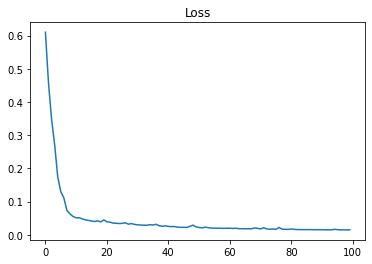

In [22]:

plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

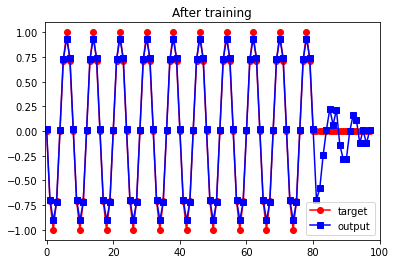

In [23]:
plt.plot(Y_train, 'ro-', label="target")
plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
plt.xlim(-0.5, 100)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.title("After training")
plt.show()

In [24]:
# 입력에 대한 weights
model.weights[0]

<tf.Variable 'simple_rnn_1/kernel:0' shape=(1, 10) dtype=float32, numpy=
array([[ 0.24065237, -0.5543643 ,  0.02074404, -0.30702   , -0.55866045,
         0.35075083,  0.29540056, -0.09533634, -0.46888888, -0.2769984 ]],
      dtype=float32)>

In [25]:
# 유닛에 대한 weights
model.weights[1]

<tf.Variable 'simple_rnn_1/recurrent_kernel:0' shape=(10, 10) dtype=float32, numpy=
array([[-0.31630722, -0.00707801, -0.42816332, -0.06879356,  0.34141913,
        -0.46076432, -0.3037084 , -0.02124802,  0.2528526 , -0.41576883],
       [ 0.410478  , -0.2139284 , -0.54833716,  0.06221759,  0.17263809,
         0.54663736, -0.13358308, -0.09872529, -0.19008051, -0.24101576],
       [-0.20370284, -0.14407118,  0.3612986 ,  0.28994146, -0.10298885,
         0.31523556,  0.11349893,  0.11309621,  0.4430566 , -0.6534425 ],
       [-0.0610658 ,  0.43949997, -0.14211753, -0.18495627, -0.31469932,
         0.21692248, -0.5605632 ,  0.3020704 ,  0.30505994,  0.13522051],
       [-0.177177  , -0.26784217, -0.21125604,  0.60112876,  0.01060094,
         0.08976421, -0.07225196, -0.25972402,  0.40341896,  0.495666  ],
       [ 0.08758023,  0.03704412,  0.40145105,  0.29210365,  0.557936  ,
        -0.06548247, -0.30084437,  0.35383618, -0.19669019,  0.06319533],
       [ 0.31322396,  0.3385624 , 

In [26]:

# bias
model.weights[2]

<tf.Variable 'simple_rnn_1/bias:0' shape=(10,) dtype=float32, numpy=
array([ 0.00054746, -0.00604442,  0.00815324, -0.0033111 , -0.01529239,
       -0.00351852, -0.00847365, -0.00526892, -0.00034939, -0.00645196],
      dtype=float32)>